In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path=r'C:\Users\User\CareerFoundry_Project_work'

In [5]:
#Importing high_activity_customers data
high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

Creating profiling variables

In [6]:
high_activity_customers['Age'].describe()

count    2.927094e+07
mean     4.947596e+01
std      1.847853e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [7]:
#Age profiling
high_activity_customers.loc[high_activity_customers['Age'] >=65, 'age_flag'] = 'Older Age'

In [8]:
high_activity_customers.loc[high_activity_customers['Age'] <=34, 'age_flag'] = 'Younger Age'

In [9]:
high_activity_customers.loc[(high_activity_customers['Age'] >= 35) & (high_activity_customers['Age'] <= 64), 'age_flag'] = 'Middle Age'

In [10]:
high_activity_customers['age_flag'].value_counts(dropna=False)


Middle Age     13755021
Younger Age     7776569
Older Age       7739348
Name: age_flag, dtype: int64

In [11]:
high_activity_customers['income'].describe()

count    2.927094e+07
mean     9.969692e+04
std      4.314845e+04
min      2.590300e+04
25%      6.736700e+04
50%      9.676300e+04
75%      1.281390e+05
max      5.939010e+05
Name: income, dtype: float64

In [12]:
#Income profiling
high_activity_customers.loc[(high_activity_customers['income'] >= 25000 ) & (high_activity_customers['income'] < 75000), 'Income_flag'] = 'Low_Income'

In [13]:
high_activity_customers.loc[(high_activity_customers['income'] >= 75000) & (high_activity_customers['income'] < 150000), 'Income_flag'] = 'Middle_Income'

In [14]:
high_activity_customers.loc[(high_activity_customers['income'] >= 150000), 'Income_flag'] = 'High_Income'

In [15]:
high_activity_customers['Income_flag'].value_counts(dropna=False)

Middle_Income    16242146
Low_Income        9354836
High_Income       3673956
Name: Income_flag, dtype: int64

In [16]:
#Dependent profiling
high_activity_customers.loc[high_activity_customers['number_of_dependents'] == 0, 'dependent_flag'] = 'No dependants'

In [17]:
high_activity_customers.loc[high_activity_customers['number_of_dependents'] > 0, 'dependent_flag'] = 'Have dependants'

In [18]:
high_activity_customers['dependent_flag'].value_counts(dropna=False)

Have dependants    21958418
No dependants       7312520
Name: dependent_flag, dtype: int64

In [19]:
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [26]:
df_depts=df_depts.rename(columns={'Unnamed: 0' : 'department_id'})

In [27]:
df_merge = high_activity_customers.merge(df_depts,on = 'department_id')

In [28]:
pd.set_option("display.max_columns", None)
# display the dataframe head
df_merge.head()

,user_id,first_name,Gender,STATE,Age,date_joined,number_of_dependents,family_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spenders,spending_flag,Regularity_of_users,regularity_flag,_merge,Region,activity_flag,age_flag,Income_flag,dependent_flag,department
0,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,8,Regular customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high_activity_customers,Middle Age,High_Income,Have dependants,beverages
1,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,8,Regular customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high_activity_customers,Middle Age,High_Income,Have dependants,beverages
2,26711,Deborah,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,8,Regular customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,high_activity_customers,Middle Age,High_Income,Have dependants,beverages
3,33890,Patricia,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,196,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,West,high_activity_customers,Middle Age,Low_Income,No dependants,beverages
4,33890,Patricia,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,196,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,West,high_activity_customers,Middle Age,Low_Income,No dependants,beverages


In [29]:
#Elderly customer profile
df_merge.loc[(df_merge['age_flag'] == 'Older Age') & (df_merge['dependent_flag'] == 'Have dependants'), 'customer_profile'] = 'Older Parent'

In [30]:
#Young parent customer profile
df_merge.loc[(df_merge['age_flag'] == 'Younger Age') & (df_merge['dependent_flag'] == 'Have dependants'), 'customer_profile'] = 'Young_Parent'

In [31]:
#Middle-aged parent customer profile
df_merge.loc[(df_merge['age_flag'] == 'Middle Age') & (df_merge['dependent_flag'] == 'Have dependants'), 'customer_profile'] = 'Middle_age_Parent'

In [32]:
#Single customers sorted by age group 
df_merge.loc[(df_merge['age_flag'] == 'Younger Age') & (df_merge['family_status'] == 'single'), 'customer_profile'] = 'Younger Single'


In [33]:
df_merge.loc[(df_merge['age_flag'] == 'Middle Age') & (df_merge['family_status'] == 'single'), 'customer_profile'] = 'Middle Aged Single'


In [34]:
df_merge.loc[(df_merge['age_flag'] == 'Older Age') & (df_merge['family_status'] == 'single'), 'customer_profile'] = 'Older Single'

Creating visualizations to show the distribution of profiles


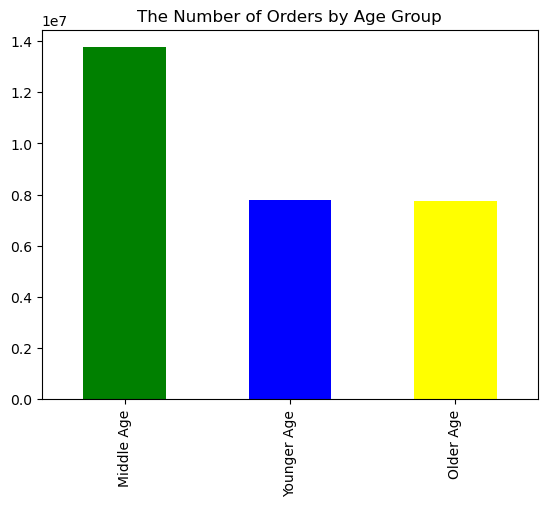

In [58]:
age_groups_bar = df_merge['age_flag'].value_counts().plot.bar(color = ['green', 'blue', 'yellow'], title = 'The Number of Orders by Age Group')

In [59]:
#Export graph
age_groups_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_groups_bar.png'))

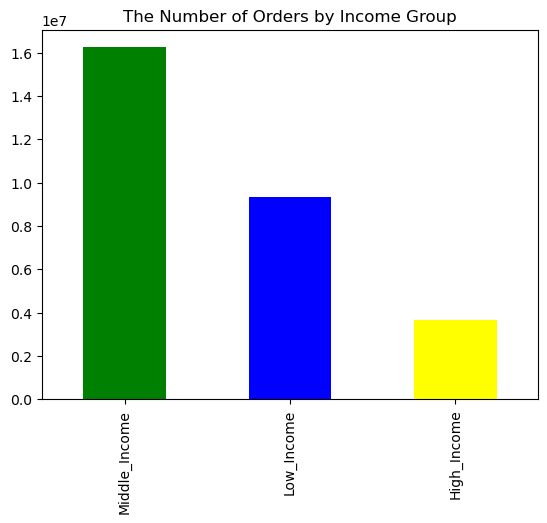

In [60]:
income_groups_bar = df_merge['Income_flag'].value_counts().plot.bar(color = ['green', 'blue', 'yellow'], title = 'The Number of Orders by Income Group')

In [61]:
#Export graph
income_groups_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_groups_bar.png'))

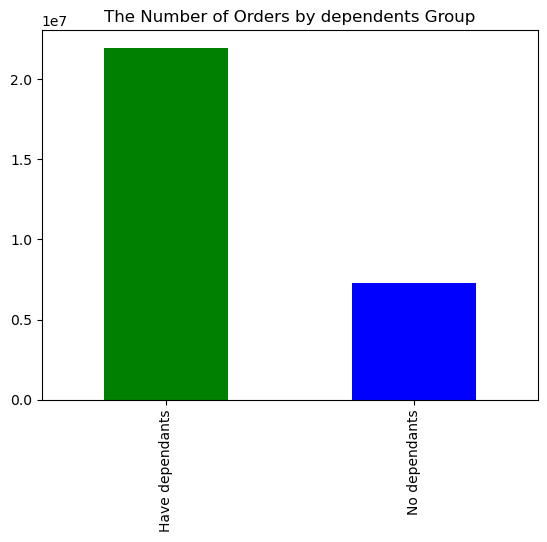

In [62]:
dependent_groups_bar = df_merge['dependent_flag'].value_counts().plot.bar(color = ['green', 'blue'], title = 'The Number of Orders by dependents Group')

In [63]:
#Export graph
dependent_groups_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependent_groups_bar.png'))

In [67]:
#Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
df_merge.groupby('age_flag').agg({'prices':['min', 'mean', 'max']})

prices                    
               min       mean      max
age_flag                              
Middle Age     1.0  11.895564  99999.0
Older Age      1.0  11.590229  99999.0
Younger Age    1.0  12.096239  99999.0

In [68]:
df_merge.groupby('customer_profile').agg({'prices':['min', 'mean', 'max']})

prices                    
                      min       mean      max
customer_profile                             
Middle Aged Single    1.0  12.521791  99999.0
Middle_age_Parent     1.0  11.834072  99999.0
Older Parent          1.0  11.423091  99999.0
Young_Parent          1.0  12.050805  99999.0
Younger Single        1.0  12.233665  99999.0

In [69]:
df_merge.groupby('family_status').agg({'number_of_dependents':['min', 'mean', 'max']})

number_of_dependents              
                                                  min      mean max
family_status                                                      
divorced/widowed                                    0  0.000000   0
living with parents and siblings                    1  1.980722   3
married                                             1  2.003090   3
single                                              0  0.000000   0

In [71]:
df_merge.groupby('customer_profile').agg({'days_since_prior_order':['min', 'mean', 'max']})

days_since_prior_order                 
                                      min       mean   max
customer_profile                                          
Middle Aged Single                    0.0  10.762218  30.0
Middle_age_Parent                     0.0  10.843106  30.0
Older Parent                          0.0  10.812258  30.0
Young_Parent                          0.0  10.803913  30.0
Younger Single                        0.0  10.932194  30.0

In [72]:
profile_region = df_merge.groupby(['Region', 'customer_profile']).size()

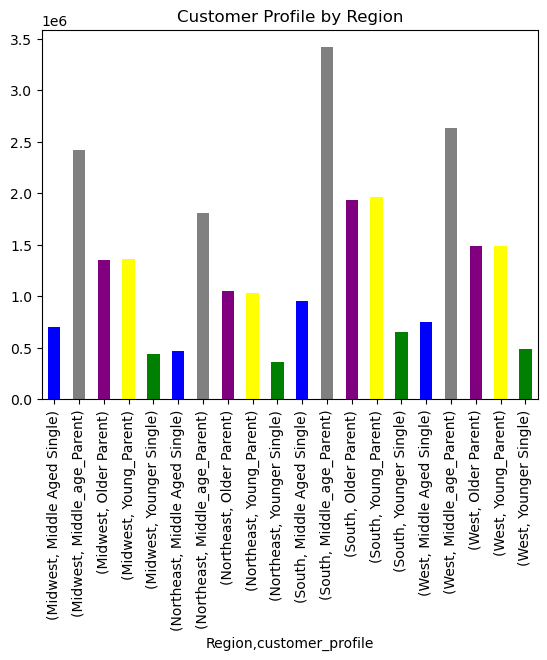

In [74]:
profile_region_bar = profile_region.plot.bar(color = ['blue','grey','purple','yellow','green'],title = 'Customer Profile by Region')

In [75]:
#Export graph
profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region_bar.png'))

In [85]:
profile_department = df_merge.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)


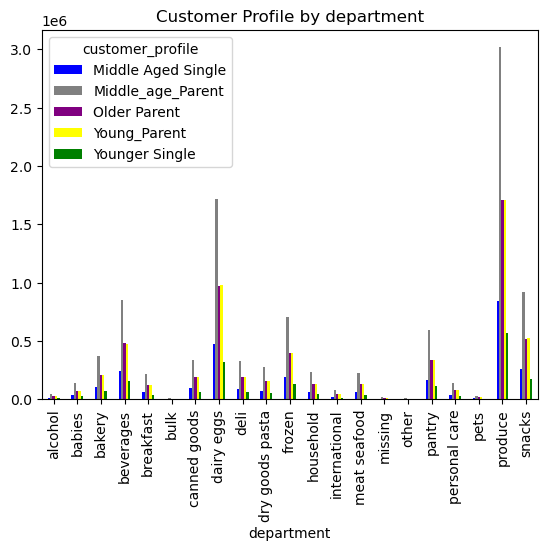

In [86]:
profile_department_bar = profile_department.plot.bar(color = ['blue','grey','purple','yellow','green'],title = 'Customer Profile by department')

In [89]:
#Export graph
profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_department_bar.png'))

In [90]:
#Exporting 
df_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_acti_customer_ords_prods_merged.pkl'))

In [41]:
df_merge.shape

(29270938, 36)